# Big Data Anlysis Project 

### 1.1 Basic

In [1]:
from  matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

sns.set_style('whitegrid')

for p in sns.palettes.SEABORN_PALETTES: 
    sns.set_palette(p)  
 

In [5]:
# Getting the csv-fil och create a dataframe

f = pd.read_csv('train_flyg.csv')

In [7]:
# Dropping the column unnamed

f.drop(columns= 'Unnamed: 0', inplace=True)

In [9]:
# Chanching categorical data to numerical so: 

# 1 = satisfied 
# 0 = neutral/dissatified

In [10]:
f = pd.get_dummies(f, columns = ['satisfaction'], drop_first = True)

In [11]:
# Changing name on the column 

f.rename(columns={'satisfaction_satisfied':'Satisfaction'}, inplace= True)

In [12]:
f.columns.tolist()

['id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Satisfaction']

In [13]:
# Creating a new column with the total sum points for each passanger

f["Tot_score"]=f.iloc[:,7:-3].sum(axis=1)

In [14]:
# Listing the columns and changing the order

f.columns.tolist()

['id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Satisfaction',
 'Tot_score']

In [15]:
# Changing the order of the columns 

f = f[['id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Tot_score',             
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Satisfaction']]

### 1.2 Basic analyse

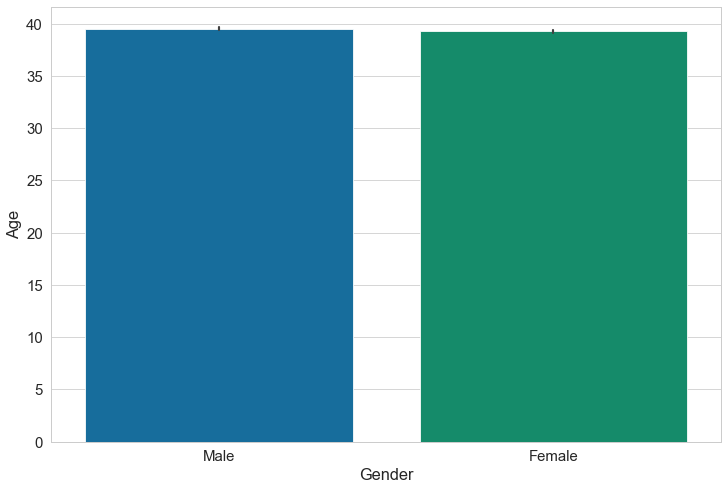

In [16]:
# Checking the mean age of the genders 

plt.figure(figsize=(12,8))
sns.set_context('paper', font_scale=1.7)
sns.barplot(data=f, x='Gender', y='Age')
plt.show()

In [17]:
# Checking the mean age 

plt.figure(figsize=(12,8))
sns.set_context('paper', font_scale=1.7)
m_k = f.groupby('Gender',as_index=True)[['Age']].mean()
m_k

,Age
Gender,
Female,39.246762
Male,39.516677


<Figure size 864x576 with 0 Axes>

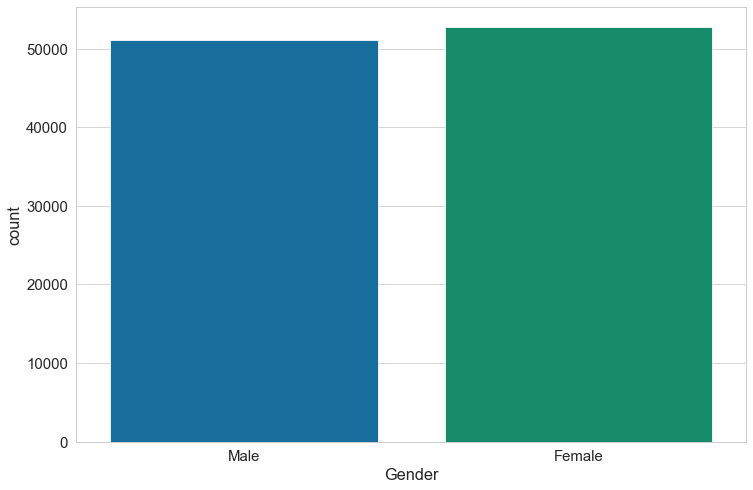

In [18]:
# Checking the distribution betwwen genders and how many that is included and the in the servey

plt.figure(figsize=(12,8))
sns.set_context('paper', font_scale=1.7)
sns.countplot(f.Gender)
sns.set_context('talk') 

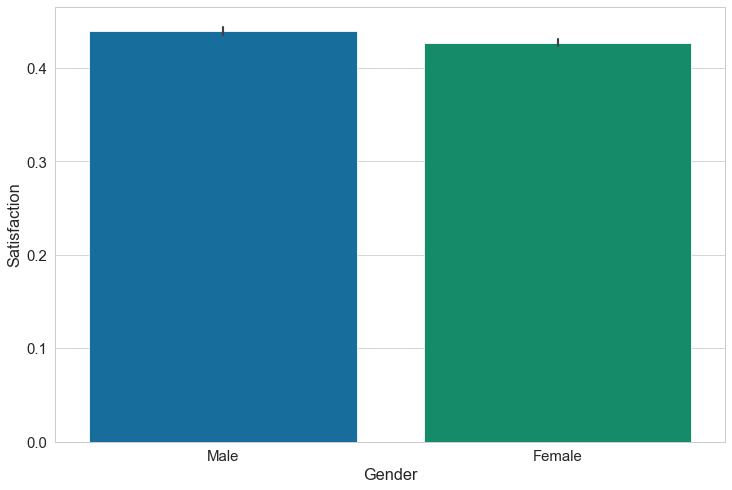

In [19]:
# Checking the distribution of satisfaction between genders 

plt.figure(figsize=(12,8))
sns.set_context('paper', font_scale=1.7)
sns.barplot(data=f, x='Gender', y='Satisfaction')
sns.set_context('paper')

In [20]:
# Chcking the satisfactionleveln between genders in percentage

f[['Gender', 'Satisfaction']].groupby(['Gender'], as_index=True).mean().sort_values(by='Satisfaction',ascending=False)

,Satisfaction
Gender,
Male,0.439475
Female,0.427371


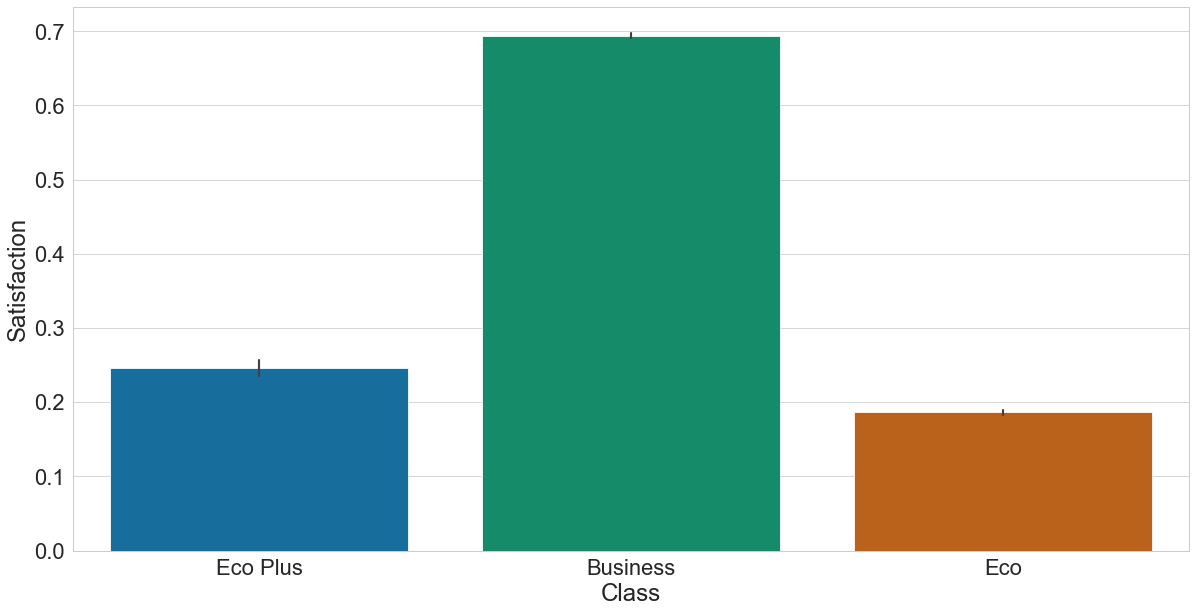

In [21]:
# Chcking the satisfactionleveln between different classes (in percentage)

plt.figure(figsize=(20,10))
sns.set_context('paper', font_scale=2.5 )
sns.barplot(data=f, x='Class', y='Satisfaction')

### 1.3 Age  

Text(0, 0.5, 'Frequency')

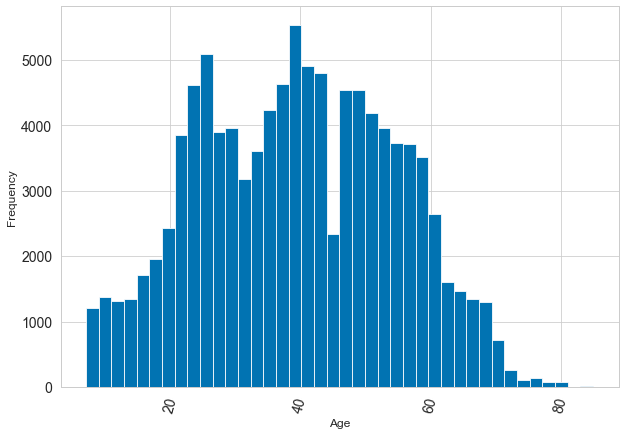

In [22]:
# Normal distribution between 20 and 60 years

f['Age'].plot(kind='hist', bins = 40, figsize = (10,7), fontsize =14,rot=75)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Frequency',fontsize=12)

<Figure size 1080x864 with 0 Axes>

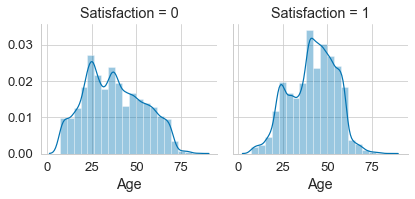

In [23]:
plt.figure(figsize=(15,12))
sns.set_context('paper', font_scale=1.5 )
a = sns.FacetGrid(f,col='Satisfaction')
a.map(sns.distplot,'Age', bins=20)


### 1.5 Flight Distance

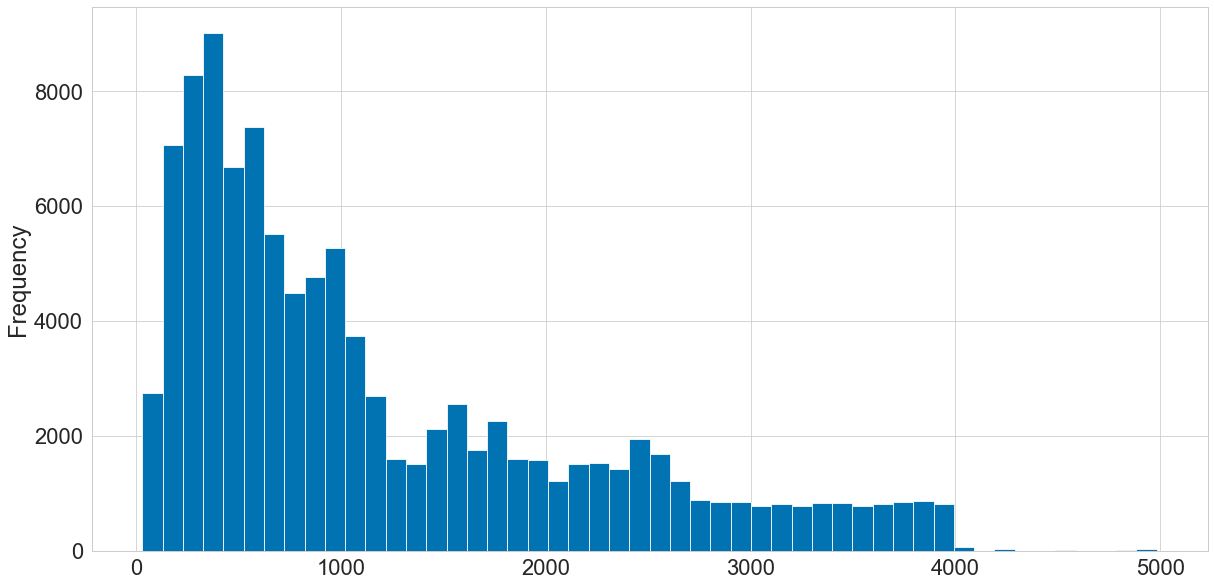

In [24]:
# Checking the most common distances. The flights are mostly between 0 och 1000 kms.

plt.figure(figsize=(20,10))
sns.set_context('paper', font_scale=2.5 )
f['Flight Distance'].plot(kind='hist',bins=50)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x576 with 0 Axes>

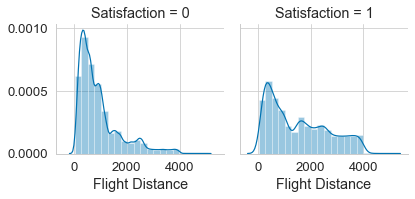

In [25]:
# Checking the correlation with sataisfaction and the distance, Satisfaction = 1 is satisfied och Satisfaction = 0 is dissatisfied. 

plt.figure(figsize=(20,8))
sns.set_context('paper', font_scale=1.5 )
fd = sns.FacetGrid(f,col='Satisfaction')
fd.map(sns.distplot,'Flight Distance', bins=20)
plt.show

### 1.4 Satisfaction

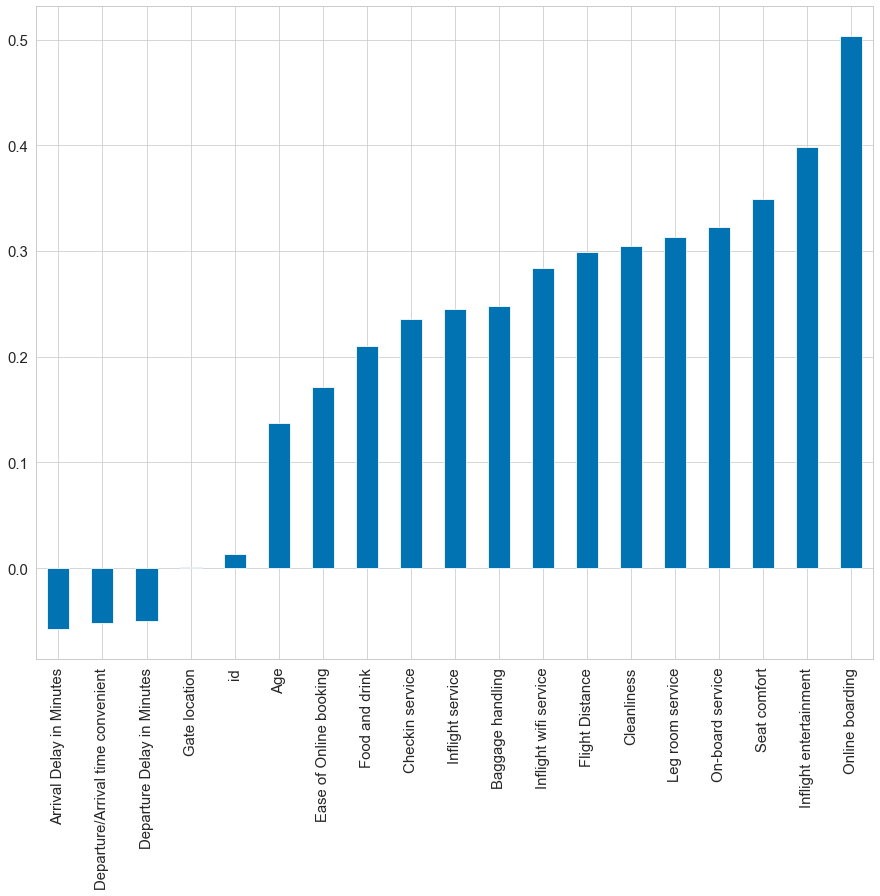

In [26]:
# Checking the correlation between satisfaction and the different areas that have been rated 

plt.figure(figsize=(15,12))
sns.set_context('paper', font_scale=1.7 )
f.corr()['Satisfaction'].sort_values().drop('Satisfaction').drop('Tot_score').plot(kind ='bar')


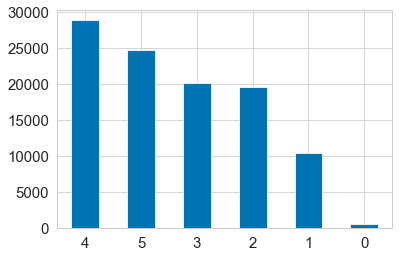

In [27]:
# Checking the distribution of votes for 'Leg room'

f['Leg room service'].value_counts().plot(kind='bar',rot=0)

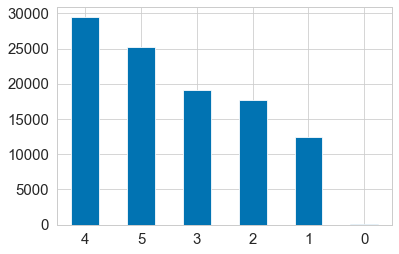

In [28]:
# Checking the distribution of votes for 'Inflight entertainment'

f['Inflight entertainment'].value_counts().plot(kind='bar',rot=0)

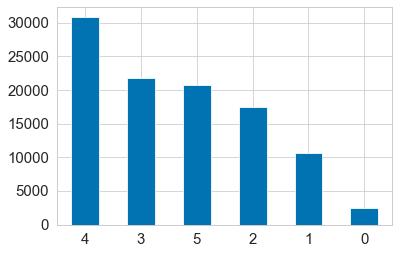

In [29]:
# Checking the distribution of votes for 'Online boardning'

f['Online boarding'].value_counts().plot(kind='bar',rot=0)

NameError: name 'rcParams' is not defined

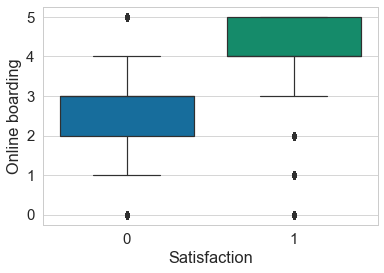

In [30]:
# In order to investigate the aspect that correlate the most with satisfaction; Online boardning
# Can see that the more satisfied a passanger is with online boarding the more satisified the passanger is in total

sns.boxplot(data=f, x = 'Satisfaction',y='Online boarding')
rcParams['figure.figsize'] = 10.7,7.27

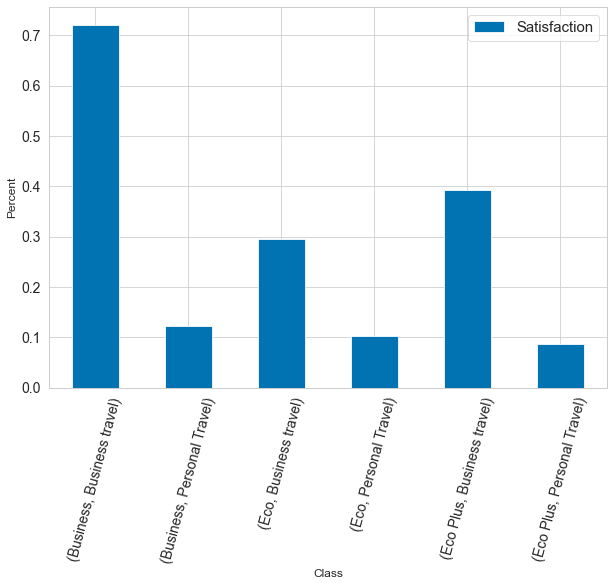

In [31]:
# Checking the distribution of private and business travels in each class

c_s = f[['Class','Type of Travel', 'Satisfaction']].groupby(['Class','Type of Travel'], as_index=True).mean()#.sort_values(by='Satisfaction',ascending=False)
c_s.plot(kind = 'bar', figsize = (10,7), fontsize =14,rot=75 )
plt.xlabel('Class',fontsize=12)
plt.ylabel('Percent',fontsize=12)
sns.set_context('paper')
plt.show()

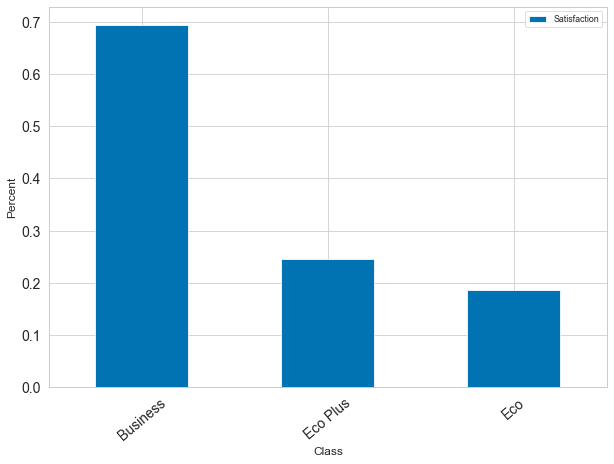

In [32]:
# # Satisfaction per class in procent

c_s = f[['Class','Satisfaction']].groupby(['Class'], as_index=True).mean().sort_values(by='Satisfaction',ascending=False)
c_s.plot(kind = 'bar', figsize = (10,7), fontsize =14,rot=40 )
plt.xlabel('Class',fontsize=12)
plt.ylabel('Percent',fontsize=12)
sns.set_context('paper')
plt.show()

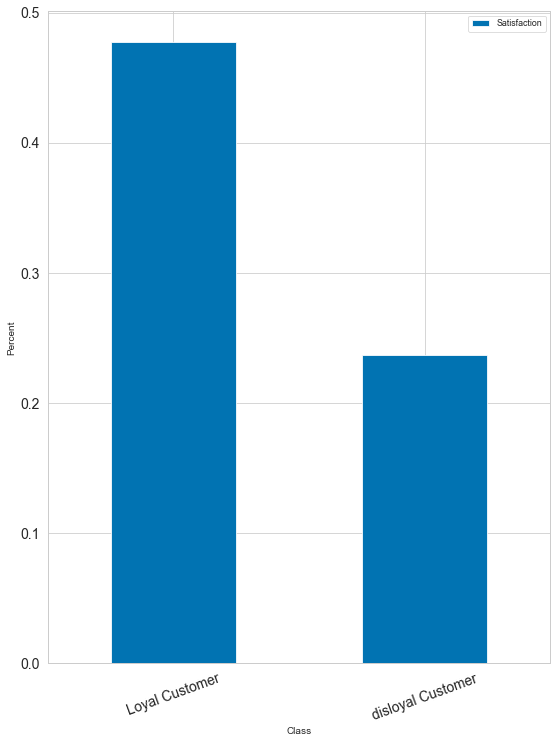

In [33]:
# Percentage of satisfaction per customer type. Loyal =48%, disloyal= 23%

ct_s = f[['Customer Type','Satisfaction']].groupby(['Customer Type'], as_index=True).mean().sort_values(by='Satisfaction',ascending=False)
ct_s.plot(kind = 'bar', figsize = (9,12), fontsize =14,rot=20 )
plt.xlabel('Class',fontsize=10)
plt.ylabel('Percent',fontsize=10)
sns.set_context('paper')

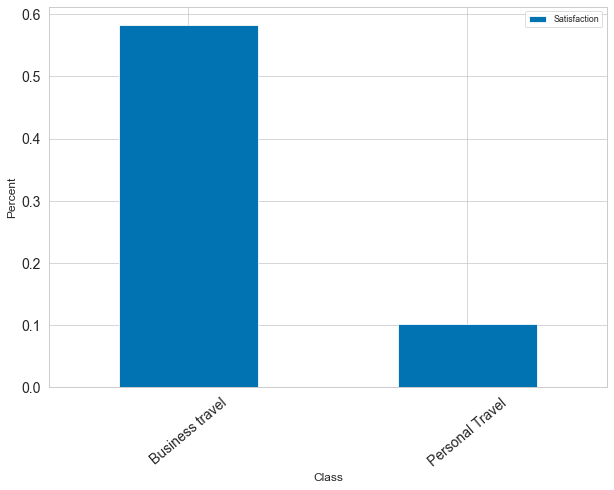

In [34]:
# 58% av business är nöjda och endast 10% av personal travel

tt_s = f[['Type of Travel','Satisfaction']].groupby(['Type of Travel'], as_index=True).mean().sort_values(by='Satisfaction',ascending=False)
tt_s.plot(kind = 'bar', figsize = (10,7), fontsize =14,rot=40 )
plt.xlabel('Class',fontsize=12)
plt.ylabel('Percent',fontsize=12)
sns.set_context('paper')

### 1.5 Index, passanger

In [35]:
# The customers that gave the highest rate 

f.Tot_score.nlargest(n=10).index

Int64Index([17786, 19921, 21845, 23105, 50196, 72581, 80436, 2320, 2875, 5502], dtype='int64')

In [36]:
f.iloc[[17786, 19921, 21845, 23105, 50196, 72581, 80436, 2320, 2875, 5502]].head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Tot_score,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
17786,72374,Male,Loyal Customer,47,Business travel,Business,2582,5,5,5,...,5,5,5,5,5,5,70,1,0.0,1
19921,107282,Male,Loyal Customer,45,Business travel,Business,283,5,5,5,...,5,5,5,5,5,5,70,28,81.0,1
21845,114589,Male,Loyal Customer,53,Business travel,Business,3574,5,5,5,...,5,5,5,5,5,5,70,29,23.0,1
23105,105220,Female,Loyal Customer,40,Business travel,Business,377,5,5,5,...,5,5,5,5,5,5,70,0,0.0,1
50196,79525,Female,Loyal Customer,39,Business travel,Business,762,5,5,5,...,5,5,5,5,5,5,70,37,36.0,1
72581,60205,Male,Loyal Customer,60,Business travel,Business,1506,5,5,5,...,5,5,5,5,5,5,70,7,0.0,1
80436,61445,Male,Loyal Customer,39,Business travel,Business,2288,5,5,5,...,5,5,5,5,5,5,70,124,120.0,1
2320,33537,Female,Loyal Customer,53,Business travel,Business,2811,5,5,5,...,5,5,5,5,5,4,69,65,48.0,1
2875,89860,Female,Loyal Customer,55,Business travel,Business,1416,5,5,5,...,5,5,5,5,5,5,69,0,0.0,1
5502,111628,Female,Loyal Customer,46,Business travel,Business,1014,5,5,5,...,5,5,5,5,5,5,69,19,1.0,1


In [37]:
# Want to find some consistent trend 
# Instead sort after the 10% most satisfied and 10% most dissatisfied

In [38]:
f.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Tot_score', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Satisfaction'],
      dtype='object')

In [39]:
#SATISFIED

nöjda = f.loc[f.Tot_score > 57, ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',]].mean().T.to_frame().reset_index()

In [40]:
nöjda.columns = ["Question", "mean"]

In [41]:
type(f)

pandas.core.frame.DataFrame

In [54]:
#DISSATISFIED

missnöjda = f.loc[f.Tot_score < 34, ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',]].mean().T.to_frame().reset_index()

missnöjda.columns = ["Question", "mean_dissatisified"]

In [55]:
# Merge meanvalues of top 10% satisfied and dissatisfied customers 

mean_question = pd.merge(nöjda,missnöjda, how="inner", on="Question")

In [56]:
mean_question

,Question,mean,mean_dissatisified
0,Inflight wifi service,4.370832,1.544984
1,Departure/Arrival time convenient,4.359781,2.025167
2,Ease of Online booking,4.291206,1.722290
3,Gate location,4.210447,2.472203
4,Food and drink,4.045622,1.943792
5,Online boarding,4.428356,1.995616
6,Seat comfort,4.518372,2.109260
7,Inflight entertainment,4.659488,1.639162
8,On-board service,4.418060,2.221589
9,Leg room service,4.329838,2.366187


In [57]:
mean_question.set_index('Question',inplace=True)

In [58]:
mean_question.columns

Index(['mean', 'mean_dissatisified'], dtype='object')

In [59]:
ysticks3 = [i for i in range (0,6,1)]

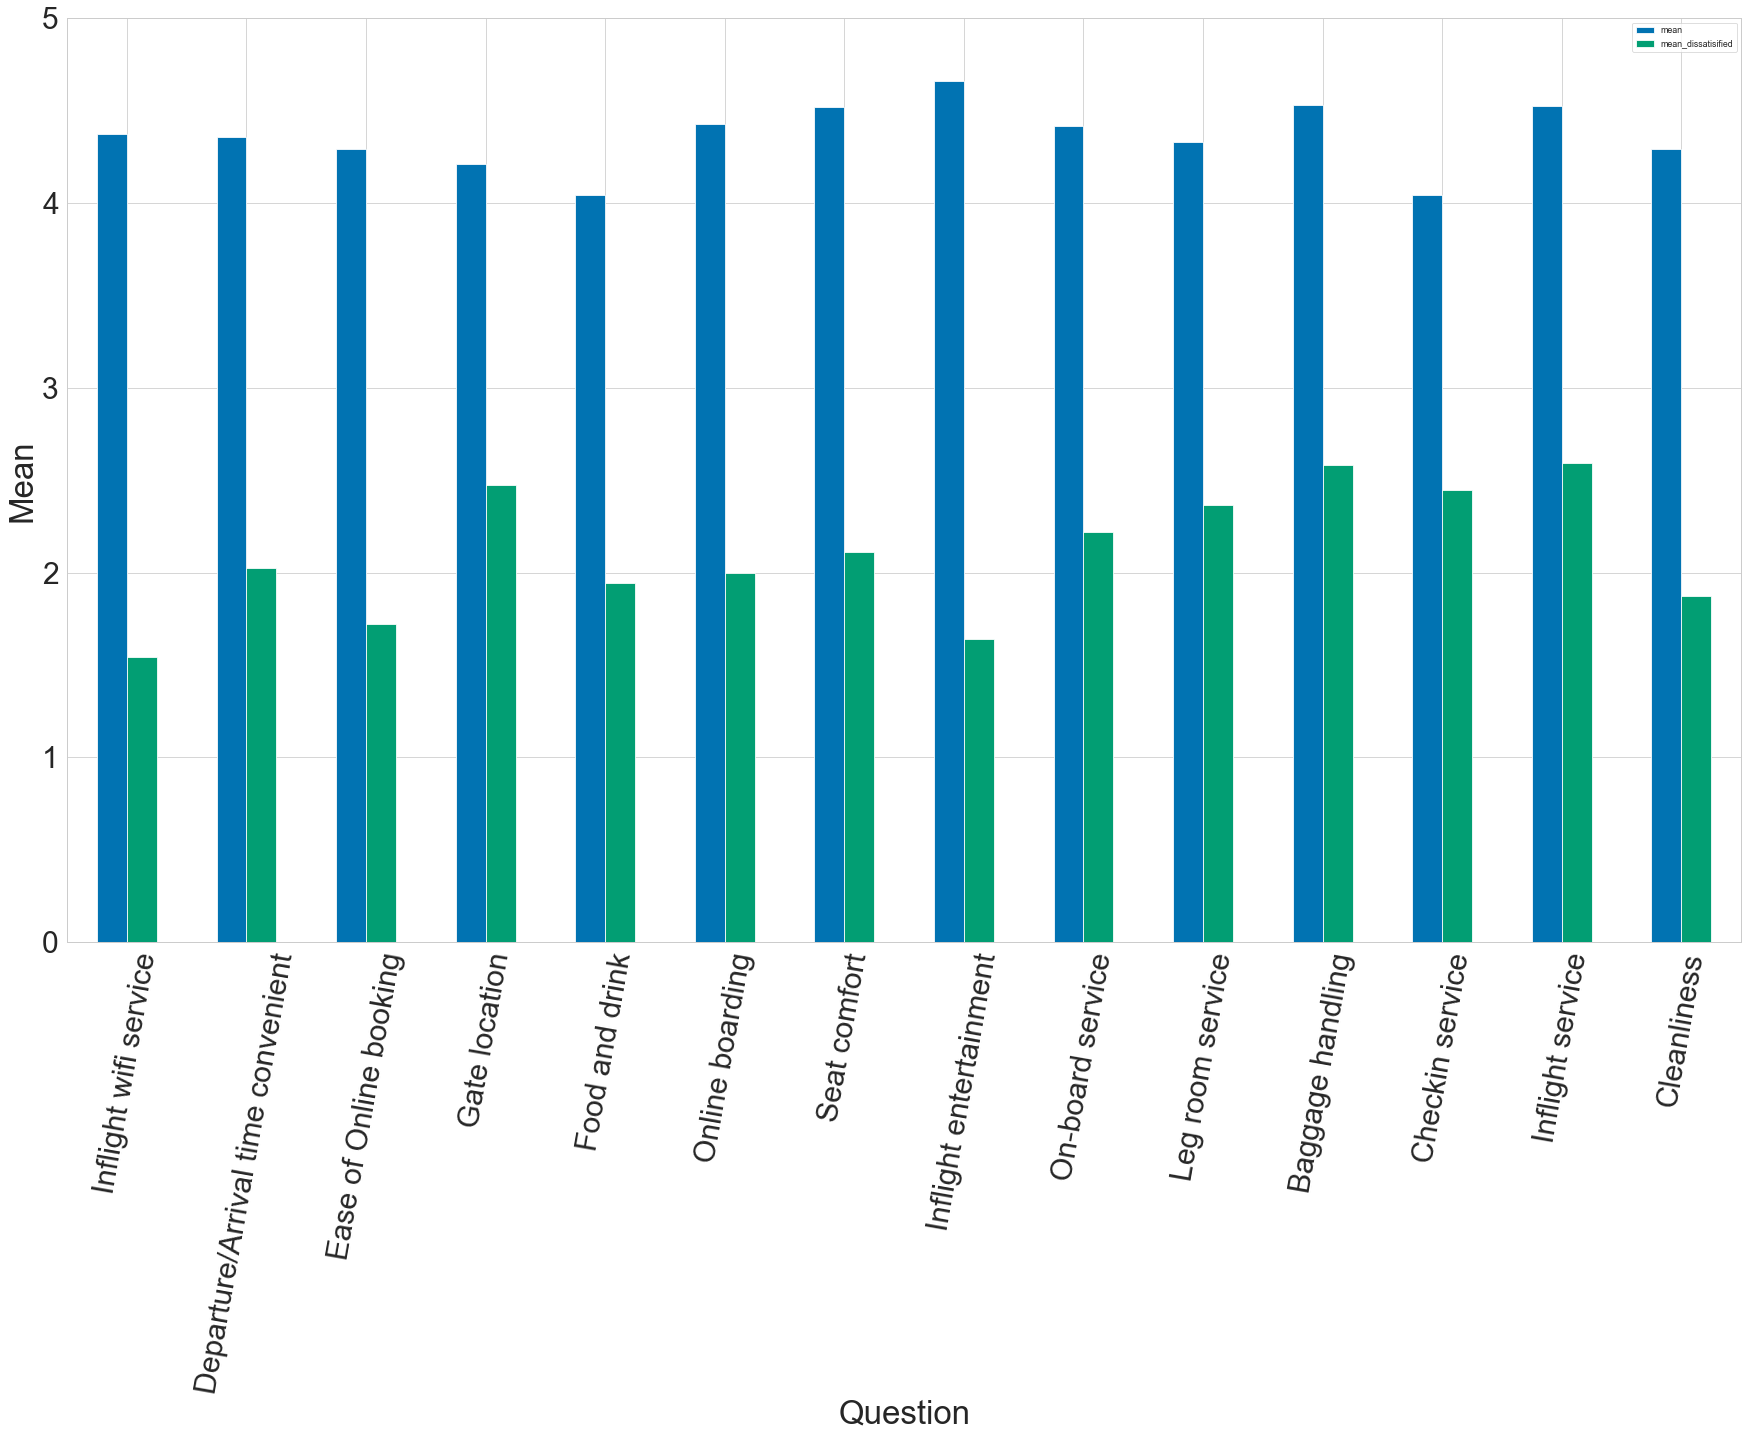

In [60]:
# Mean of top 10% satisfied and 10% disstisfied passangers

mean_question.plot(kind = 'bar', figsize = (30,17), fontsize =30, rot=80, yticks = ysticks3)
plt.xlabel('Question',fontsize=33)
plt.ylabel('Mean',fontsize=33)
sns.set_style('whitegrid')
plt.show()

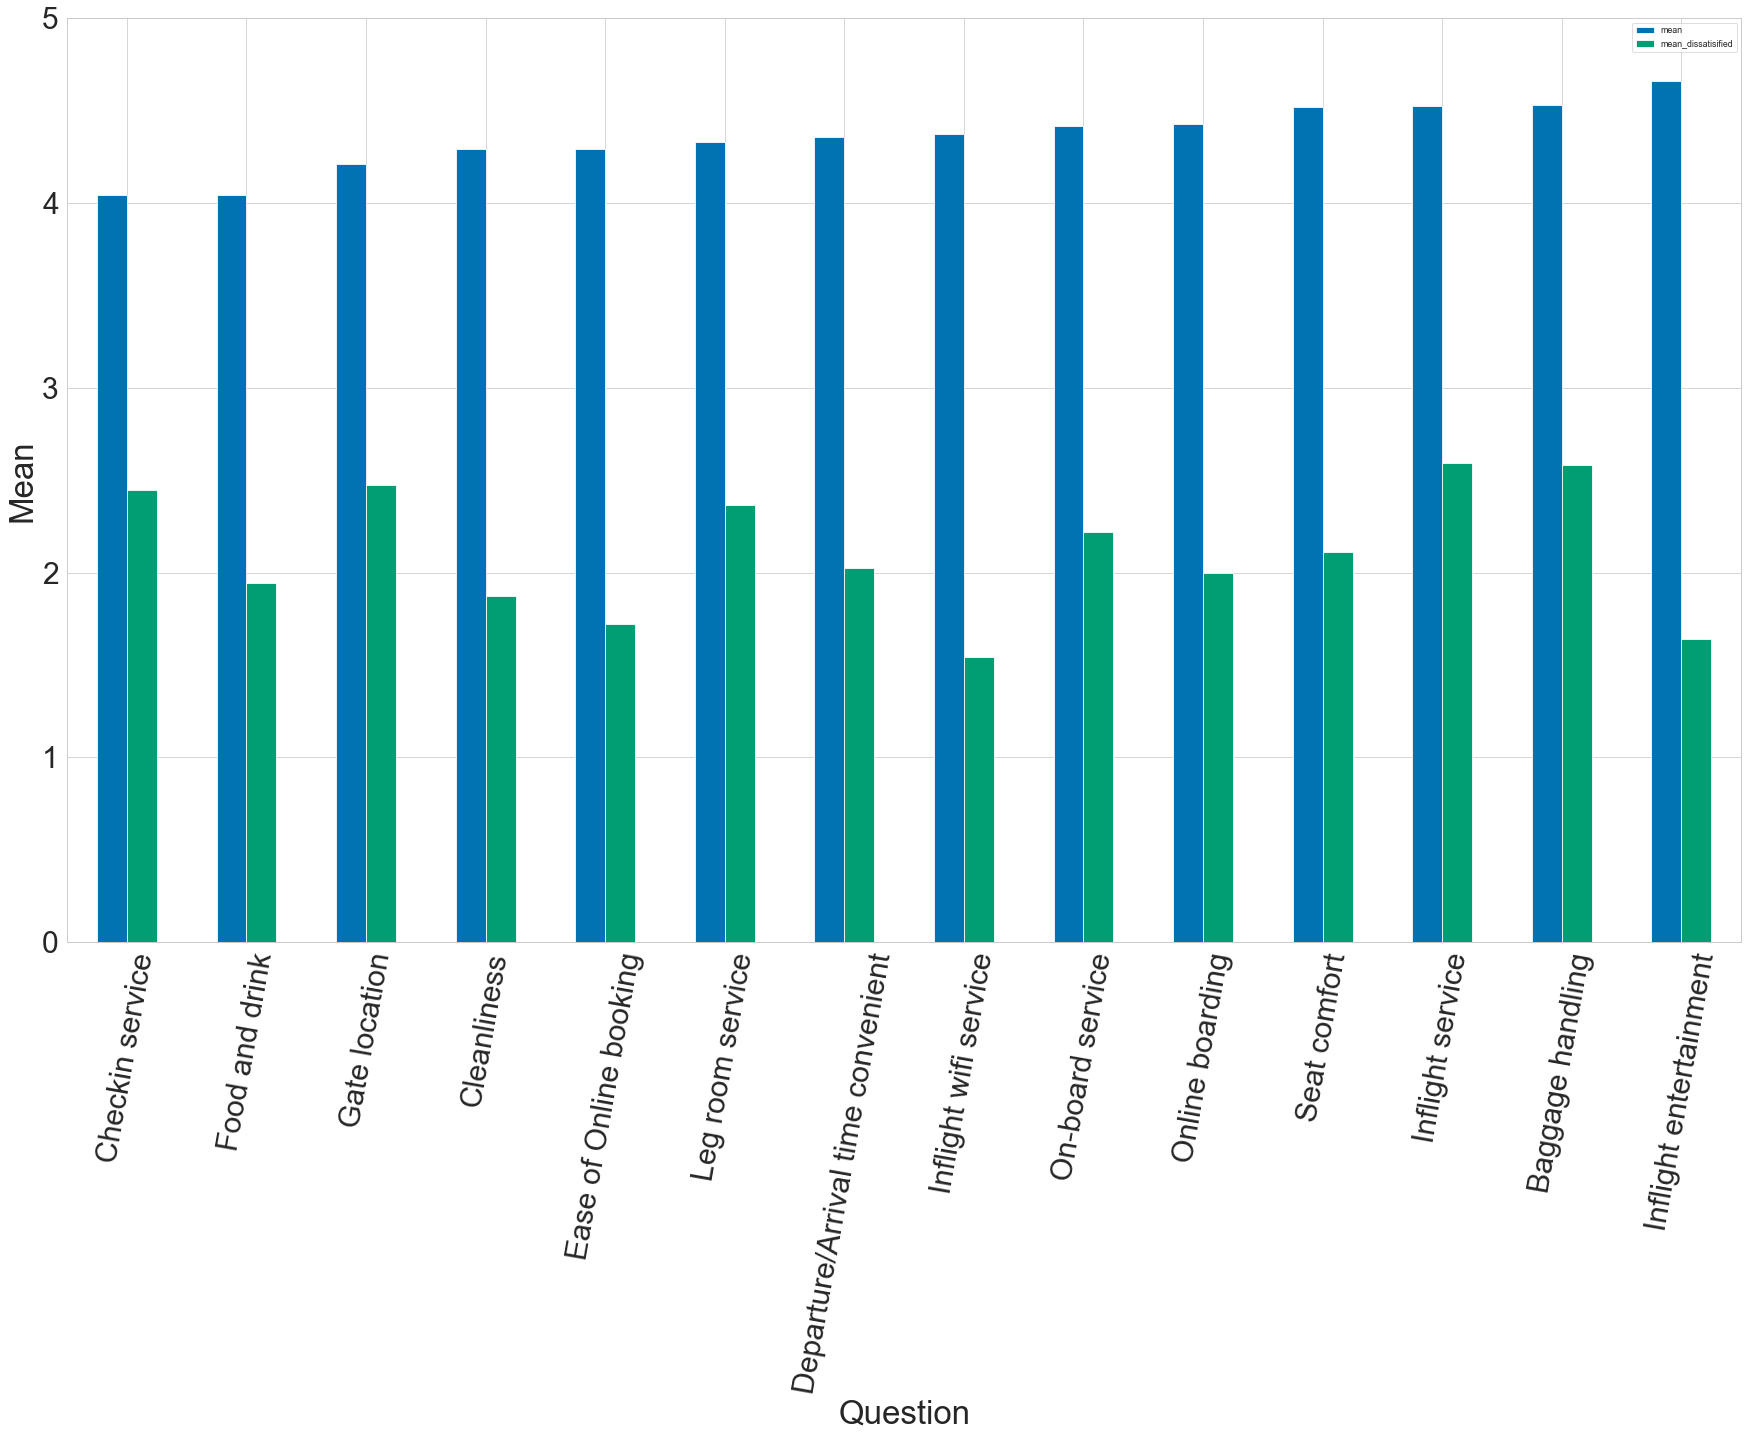

In [61]:
# Sorted on mean for the 10% passangers that is most satisfied

ver_mean = mean_question.sort_values(by='mean')
ver_mean.plot(kind = 'bar', figsize = (30,17), fontsize =30, rot=80, yticks = ysticks3)
plt.xlabel('Question',fontsize=33)
plt.ylabel('Mean',fontsize=33)
plt.show()

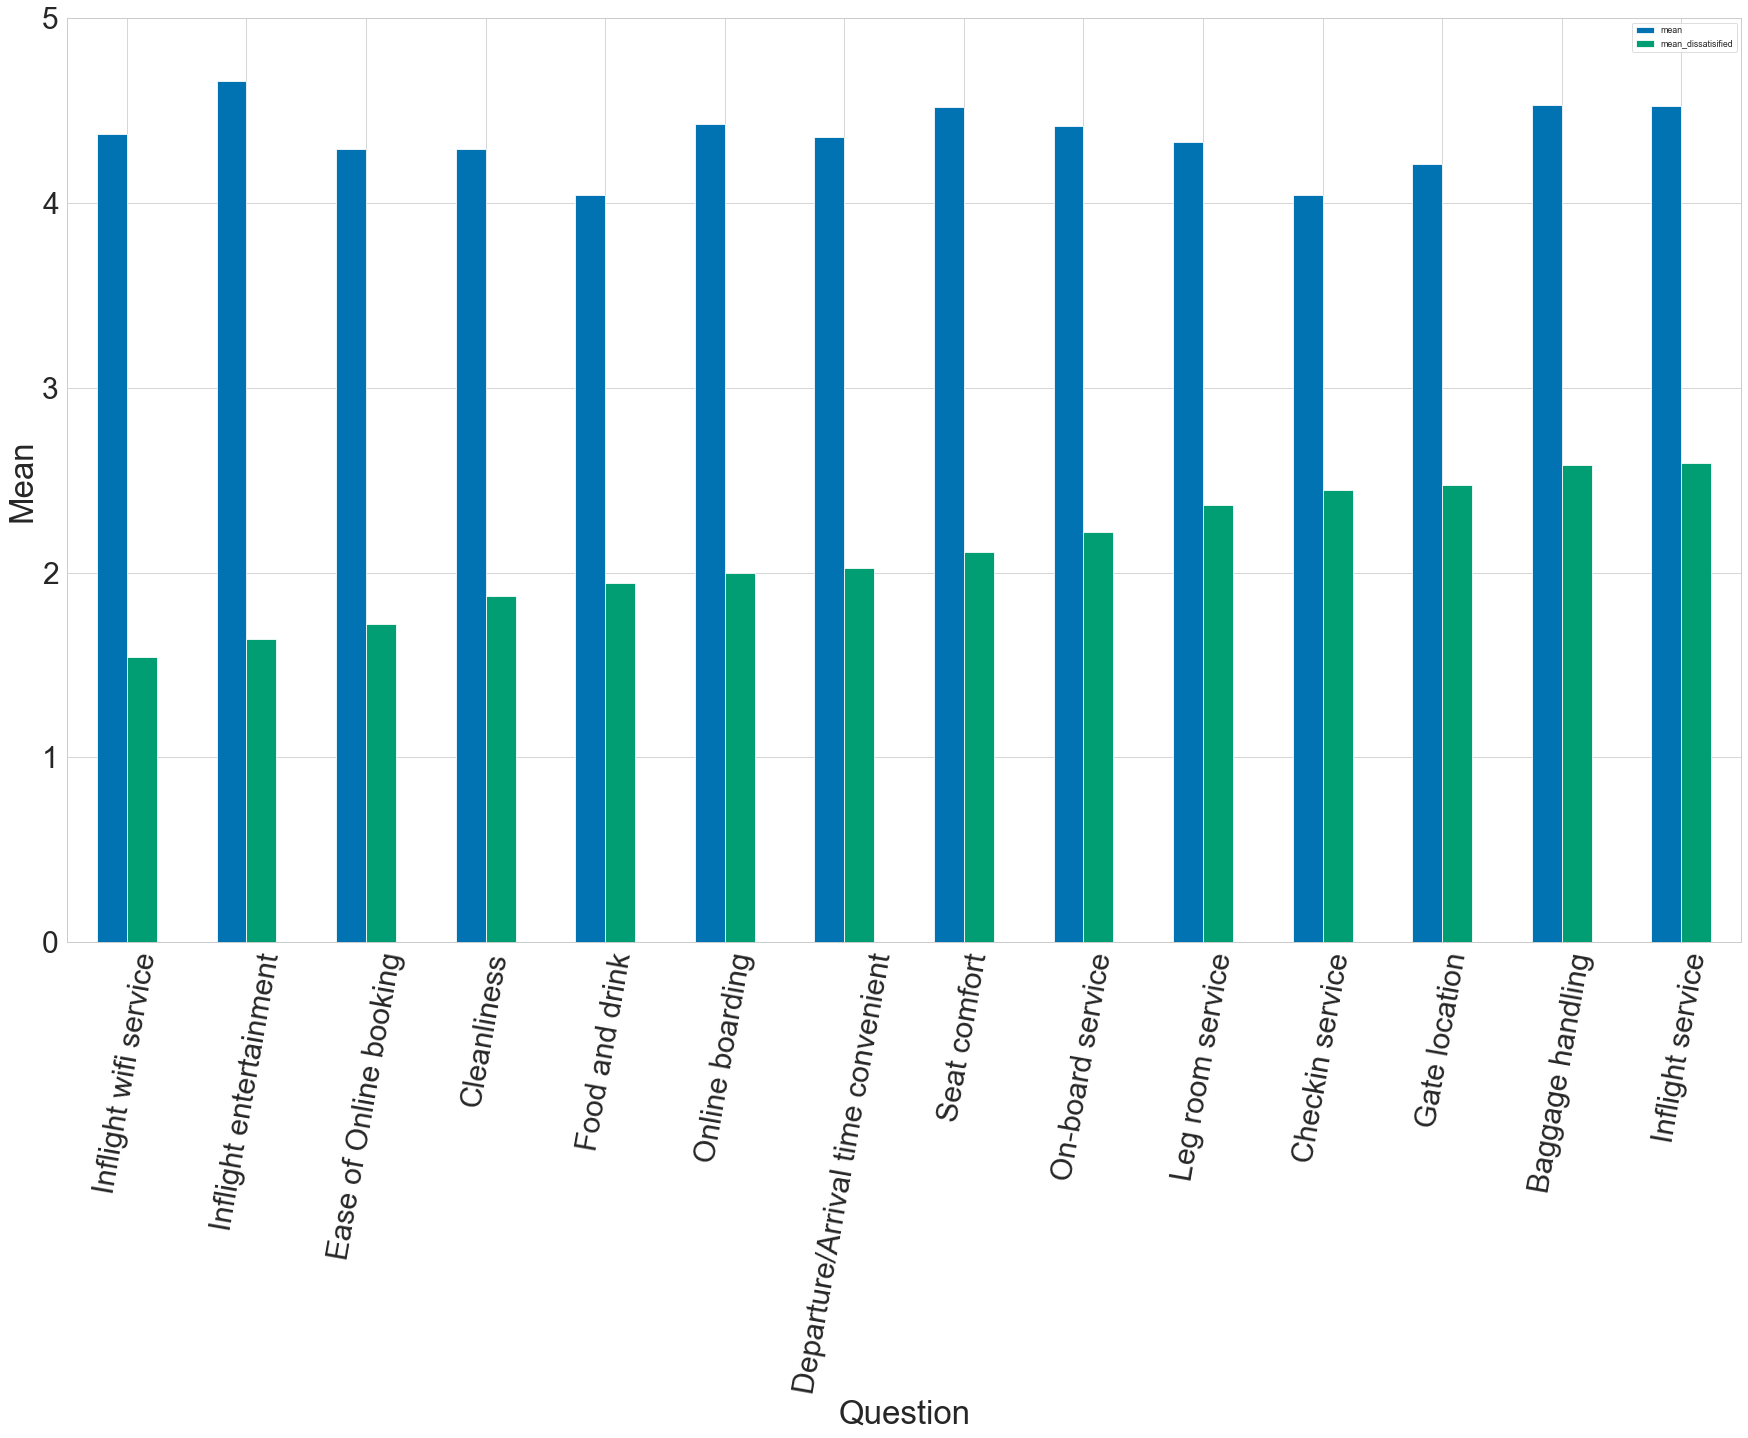

In [62]:
# Sorted on mean for the 10% passangers that is most dissatisfied

dis_mean= mean_question.sort_values(by='mean_dissatisified')
dis_mean.plot(kind = 'bar', figsize = (30,17), fontsize =30, rot=80, yticks = ysticks3)
plt.xlabel('Question',fontsize=33)
plt.ylabel('Mean',fontsize=33)
sns.set_style('whitegrid')
plt.show()

In [63]:
# Looking for unique variables 
s = f.loc[f.Tot_score > 57]

In [64]:
s[s.Class.str.contains('Business')].count()

id                                   8613
Gender                               8613
Customer Type                        8613
Age                                  8613
Type of Travel                       8613
Class                                8613
Flight Distance                      8613
Inflight wifi service                8613
Departure/Arrival time convenient    8613
Ease of Online booking               8613
Gate location                        8613
Food and drink                       8613
Online boarding                      8613
Seat comfort                         8613
Inflight entertainment               8613
On-board service                     8613
Leg room service                     8613
Baggage handling                     8613
Checkin service                      8613
Inflight service                     8613
Cleanliness                          8613
Tot_score                            8613
Departure Delay in Minutes           8613
Arrival Delay in Minutes          

In [65]:
# Customers with lowest rating

f.Tot_score.nsmallest(n=10).index

Int64Index([20959, 89930, 5312, 20952, 27672, 38763, 2994, 6666, 6914, 10614], dtype='int64')

In [68]:
low_s = f.iloc[[20959, 89930, 5312, 20952, 27672, 38763, 2994, 6666, 6914, 10614]]

### Correlation between delay dep och arr. 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

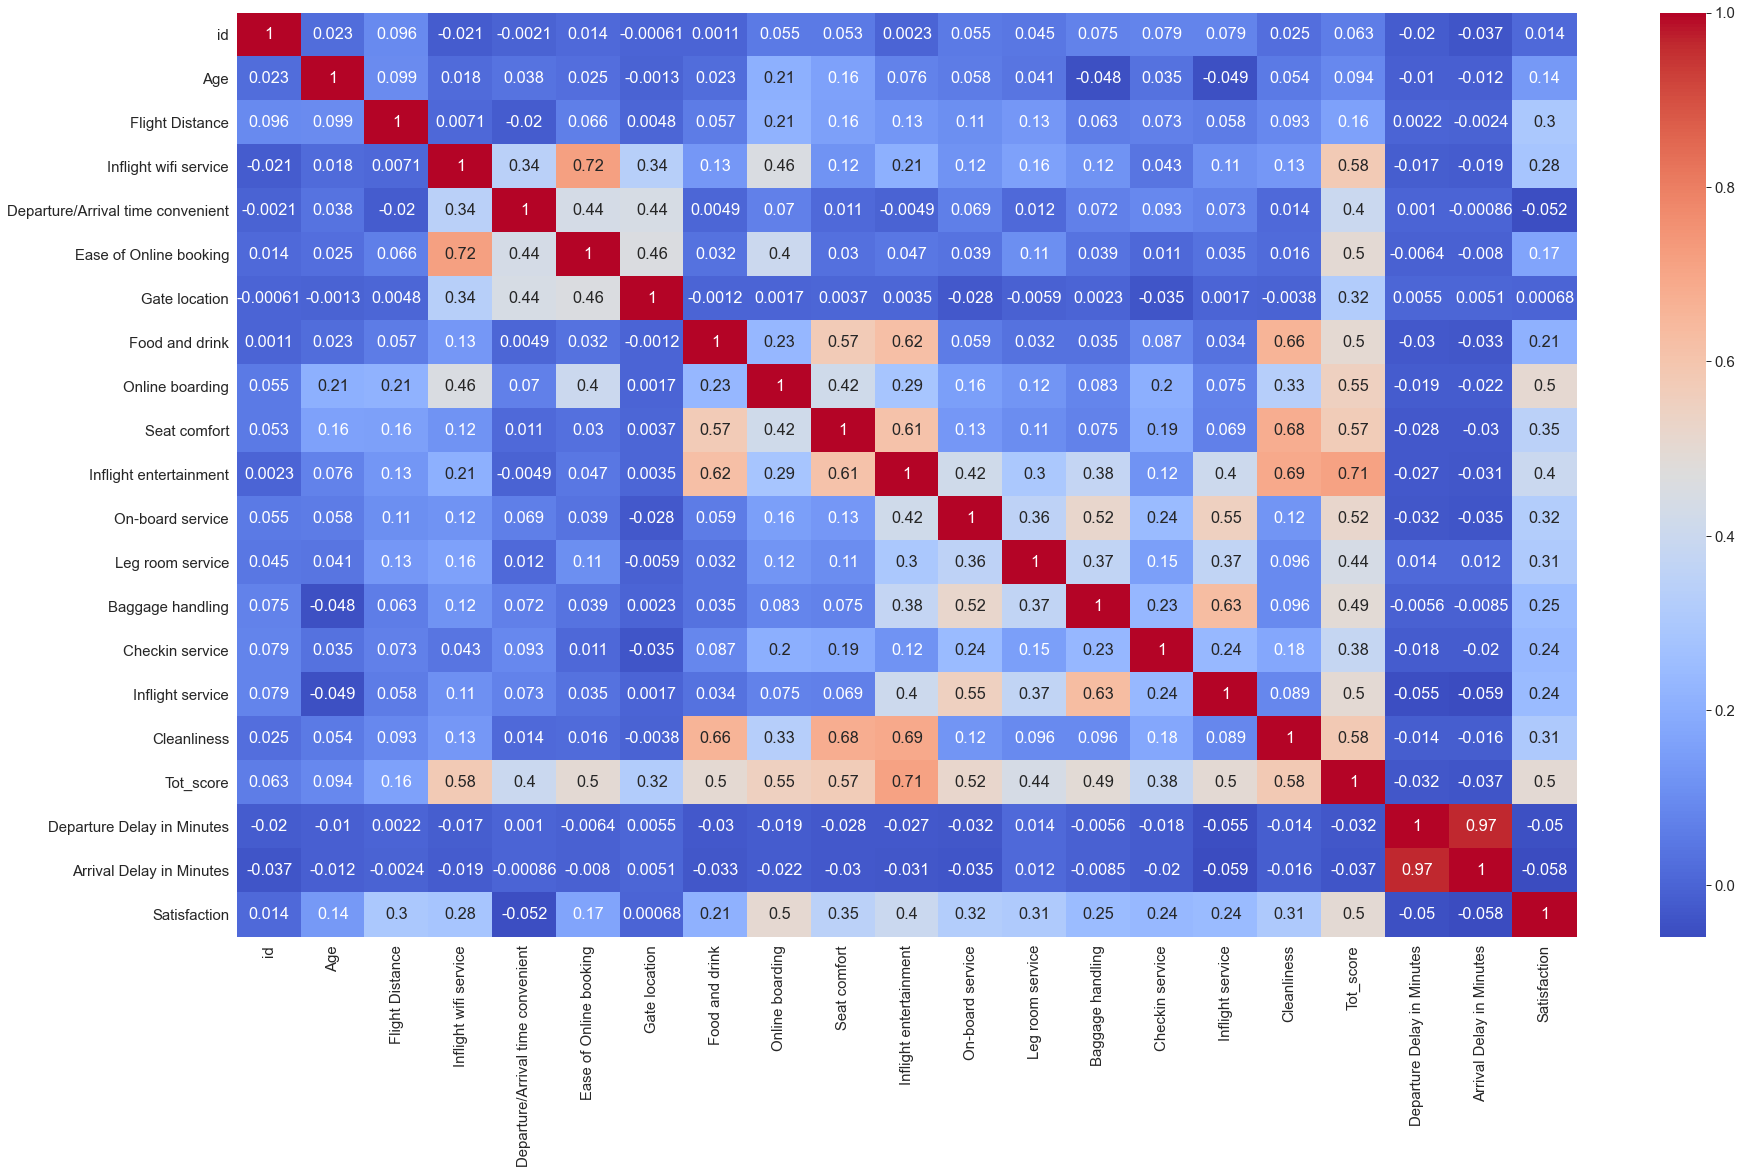

In [69]:
plt.figure(figsize=(30,17))
sns.set_context('paper', font_scale=1.7 )
sns.heatmap(f.corr(),annot=True,cmap='coolwarm')
plt.tight_layout

<Figure size 1080x1224 with 0 Axes>

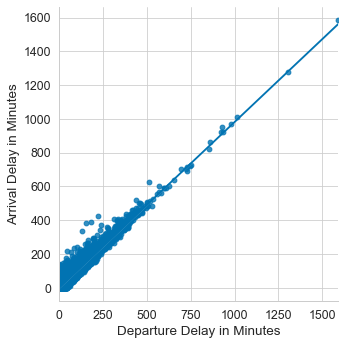

In [70]:
# Visar på linjär korrelation så inte relevant

plt.figure(figsize=(15,17))
sns.set_context('paper', font_scale=1.4 )
sns.lmplot(data=f, x = 'Departure Delay in Minutes', y ='Arrival Delay in Minutes')

In [71]:
f.to_csv("Big Dara Analysis Project_clean.csv")